In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arxiv-papers-dataset-for-nlp-project/arxiv_math_paper.csv


In [2]:
df = pd.read_csv('/kaggle/input/arxiv-papers-dataset-for-nlp-project/arxiv_math_paper.csv')
df.head(10)

,Unnamed: 0,subcategory,title,summary
0,0,math.AC,Binomial expansion for saturated and symbolic ...,There are two different notions for symbolic...
1,1,math.AC,Valuations in algebraic field extensions,Let $K\to L$ be an algebraic field extension...
2,2,math.AC,Specialization and Integral Closure,We prove that the integral closedness of any...
3,3,math.AC,A matrix-based approach to properness and inve...,We present a matrix-based algorithm for deci...
4,4,math.AC,Some Open Problems on Locally Finite or Locall...,Let $R$ be a commutative ring and $\mathcal ...
5,5,math.AC,Ulrich sheaves and higher-rank Brill-Noether t...,An Ulrich sheaf on an embedded projective va...
6,6,math.AC,The vanishing conjecture for maps of Tor and d...,"We say an excellent local domain $(S,n)$ sat..."
7,7,math.AC,Absolute irreducibility of the binomial polyno...,In this paper we investigate the factorizati...
8,8,math.AC,Stability of associated forms,"We show that the associated form, or equival..."
9,9,math.AC,Graphs and Hermitian matrices: discrepancy and...,We introduce a measure of discrepancy of Her...


In [3]:
df['subcategory'].value_counts().sort_values(ascending=False)

math.FA    34847
math.SG    34273
math.OA    30034
math.CO    29902
math.OC    29612
math.AP    29203
math.GT    28322
math.GR    28294
math.NT    26904
math.MP    26820
math.RT    26152
math.LO    25160
math.AC    24294
math.CA    24167
math.MG    23386
math.CV    23298
math.AT    23290
math.IT    22966
math.ST    22330
math.AG    21831
math.KT    21384
math.NA    20915
math.DS    19766
math.DG    19195
math.CT    18939
math.PR    18902
math.RA    16168
math.SP    14693
math.GM    13874
math.QA    11206
math.GN    11130
math.HO     9515
Name: subcategory, dtype: int64

In [4]:
def parse(s):
    s = s.str.replace(r'\$.*$', '')
    s = s.str.replace("\'", '', regex=False)
    s = s.str.replace("'s", '', regex=False)
    s = s.str.replace(r'\\\S+', '')
    s = s.str.replace(r'\d+', '')
    s = s.str.replace(r'[^\w\s]', ' ')
    s = s.str.replace(r'\s+', ' ')
    s = s.str.lower()
    #s = s.str.replace(r'[^a-z ]+', '')
    s = s.str.replace(r' \w? +', ' ')
    return s

In [5]:
df['title'] = parse(df['title'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back 

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

stop = stopwords.words('english')

lem = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
temp = df['title'].apply(lambda x:[lem.lemmatize(token) for token in word_tokenize(x) if token not in \
                                   stop and len(token)>1 and token.isalpha()])

In [8]:
useful = (temp.apply(lambda x:len(x))>=4)
X = df.loc[useful, :]
X['title'] = temp.apply(lambda x:' '.join(x))[useful]
X.reset_index(inplace=True, drop=True)
print(X.shape)
for i in range(0,5):
    print(X['title'].values[i])
    print('-'*100)
    print()

(655832, 4)
binomial expansion saturated symbolic power sum ideal
----------------------------------------------------------------------------------------------------

valuation algebraic field extension
----------------------------------------------------------------------------------------------------

matrix based approach properness inversion problem rational surface
----------------------------------------------------------------------------------------------------

open problem locally finite locally nilpotent derivation
----------------------------------------------------------------------------------------------------

ulrich sheaf higher rank brill noether theory
----------------------------------------------------------------------------------------------------



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [10]:
target_encoder = LabelEncoder()
X['subcategory'] = target_encoder.fit_transform(X['subcategory'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
def tokenizer(s):
    return s.split()

X_train, X_test, y_train, y_test = train_test_split(X[['title']], X['subcategory'], test_size=0.2, random_state=91,
                                                    stratify = X['subcategory'])

In [12]:
tfidf = TfidfVectorizer(max_features=3000, tokenizer = tokenizer, ngram_range = (1,3), decode_error='ignore', stop_words=None)

lr_pipe = Pipeline([('vect', tfidf), ('lr', LogisticRegression(solver='liblinear'))])

param_grid = {'vect__max_df':[0.4, 0.6, 0.8],
             'lr__C':[4, 9, 18], 'lr__penalty':['l1']}
gs_lr_pipe = GridSearchCV(lr_pipe, param_grid,
                           scoring='f1_macro',
                           cv=5,
                           verbose=3,
                           n_jobs=-1)

gs_lr_pipe.fit(X_train['title'], y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END lr__C=4, lr__penalty=l1, vect__max_df=0.4;, score=0.615 total time= 7.6min
[CV 3/5] END lr__C=4, lr__penalty=l1, vect__max_df=0.4;, score=0.616 total time= 7.6min
[CV 1/5] END lr__C=4, lr__penalty=l1, vect__max_df=0.6;, score=0.615 total time= 7.4min
[CV 3/5] END lr__C=4, lr__penalty=l1, vect__max_df=0.6;, score=0.616 total time= 7.2min
[CV 4/5] END lr__C=4, lr__penalty=l1, vect__max_df=0.6;, score=0.618 total time= 7.4min
[CV 2/5] END lr__C=4, lr__penalty=l1, vect__max_df=0.8;, score=0.613 total time= 7.6min
[CV 4/5] END lr__C=4, lr__penalty=l1, vect__max_df=0.8;, score=0.618 total time= 7.4min
[CV 1/5] END lr__C=9, lr__penalty=l1, vect__max_df=0.4;, score=0.616 total time= 7.8min
[CV 3/5] END lr__C=9, lr__penalty=l1, vect__max_df=0.4;, score=0.618 total time= 8.0min
[CV 5/5] END lr__C=9, lr__penalty=l1, vect__max_df=0.4;, score=0.615 total time= 7.9min
[CV 2/5] END lr__C=9, lr__penalty=l1, vect__max_df=0.6;, sco

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(decode_error='ignore',
                                                        max_features=3000,
                                                        ngram_range=(1, 3),
                                                        tokenizer=<function tokenizer at 0x7ff9f392def0>)),
                                       ('lr',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'lr__C': [4, 9, 18], 'lr__penalty': ['l1'],
                         'vect__max_df': [0.4, 0.6, 0.8]},
             scoring='f1_macro', verbose=3)

In [13]:
gs_lr_pipe.best_params_

{'lr__C': 18, 'lr__penalty': 'l1', 'vect__max_df': 0.4}

In [14]:
best_tfidf = tfidf = TfidfVectorizer(max_features=3000, tokenizer = tokenizer,max_df=0.8, ngram_range = (1,3), decode_error='ignore', stop_words=None)
best_lr = LogisticRegression(penalty='l1', C=18, solver='liblinear')

best_lr_model = Pipeline([('vect', best_tfidf), ('lr', best_lr)])

In [15]:
best_lr_model.fit(X_train['title'], y_train)
lr_y_pred = best_lr_model.predict(X_test['title'])

print(classification_report(y_test, lr_y_pred, target_names=target_encoder.inverse_transform([i for i in range(0,32)])))

              precision    recall  f1-score   support

     math.AC       0.66      0.67      0.66      4260
     math.AG       0.60      0.65      0.62      3855
     math.AP       0.71      0.77      0.74      5708
     math.AT       0.54      0.48      0.51      3936
     math.CA       0.54      0.58      0.56      4411
     math.CO       0.61      0.71      0.66      5072
     math.CT       0.56      0.51      0.53      3064
     math.CV       0.63      0.57      0.60      4242
     math.DG       0.63      0.62      0.63      3513
     math.DS       0.61      0.61      0.61      3675
     math.FA       0.58      0.62      0.60      6268
     math.GM       0.42      0.24      0.30      2291
     math.GN       0.56      0.46      0.51      1820
     math.GR       0.66      0.74      0.70      4931
     math.GT       0.70      0.72      0.71      4971
     math.HO       0.48      0.41      0.44      1512
     math.IT       0.87      0.87      0.87      4465
     math.KT       0.54    

In [16]:
lr_model = gs_lr_pipe.best_estimator_
lr_model.fit(X_train['title'], y_train)
y_pred = lr_model.predict(X_test['title'])

print(classification_report(y_test, y_pred, target_names=target_encoder.inverse_transform([i for i in range(0,32)])))

              precision    recall  f1-score   support

     math.AC       0.66      0.67      0.66      4260
     math.AG       0.60      0.65      0.62      3855
     math.AP       0.71      0.77      0.74      5708
     math.AT       0.54      0.48      0.51      3936
     math.CA       0.54      0.58      0.56      4411
     math.CO       0.61      0.71      0.66      5072
     math.CT       0.56      0.51      0.53      3064
     math.CV       0.63      0.57      0.60      4242
     math.DG       0.63      0.62      0.63      3513
     math.DS       0.61      0.61      0.61      3675
     math.FA       0.58      0.62      0.60      6268
     math.GM       0.42      0.24      0.30      2291
     math.GN       0.56      0.46      0.51      1820
     math.GR       0.66      0.74      0.70      4931
     math.GT       0.70      0.72      0.71      4971
     math.HO       0.48      0.41      0.44      1512
     math.IT       0.87      0.87      0.87      4465
     math.KT       0.54    

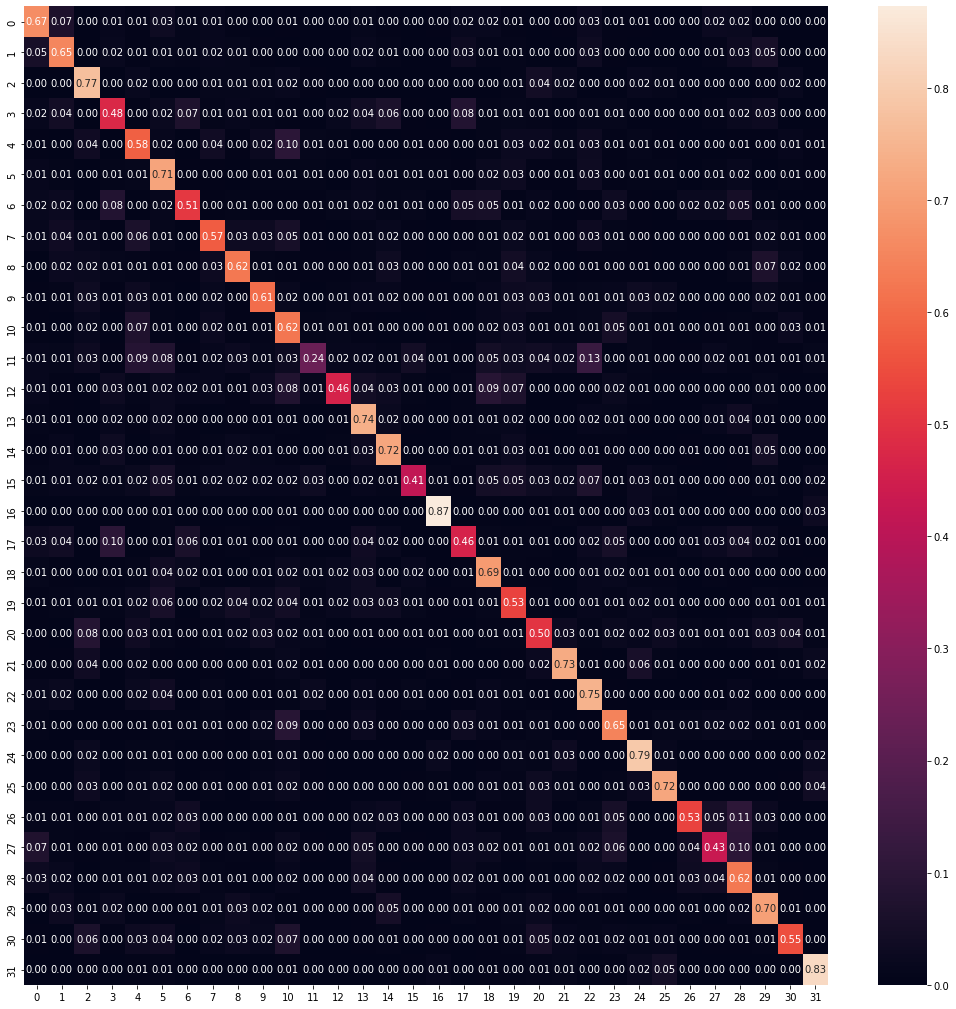

In [17]:
import seaborn as sb

cm = confusion_matrix(y_test, lr_y_pred, normalize='true')
plt.figure(figsize=(18,18))
sb.heatmap(cm, annot=True, fmt='.2f')
plt.show()

In [18]:
lr_wts = pd.DataFrame(best_lr_model['lr'].coef_, columns = best_lr_model['vect'].get_feature_names(),
                   index=target_encoder.inverse_transform([i for i in range(0,32)]))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
lr_wts.loc['math.AG', :].sort_values(ascending=False)[:40]

markov process                  15.704999
torus knot                      11.295402
vertex algebra                  10.541227
hamiltonian system              10.439306
einstein metric                  9.477349
system using                     9.096088
fock space                       8.690639
nonlinear equation               8.155136
rees algebra                     7.166876
associative algebra              7.128397
mukai                            6.808886
topological entropy              6.733630
two variable                     6.704547
evolution equation               6.643598
non archimedean                  6.349439
yang baxter equation             6.258658
zeta function                    6.062200
hodge                            5.968902
chebyshev polynomial             5.948006
hardy space                      5.882466
birational                       5.647931
stability condition              5.508535
threefolds                       5.480078
quantum cohomology               5

In [20]:
count = CountVectorizer(max_features=3000, tokenizer = tokenizer, ngram_range = (1,3), decode_error='ignore', stop_words=None)

nb_pipe = Pipeline([('vect', count), ('nb', MultinomialNB())])

In [21]:
param_grid = {'vect__max_df':[0.05, 0.1, 0.15],
             'nb__alpha':[0.001, 0.002, 0.004]}
gs_nb_pipe = GridSearchCV(nb_pipe, param_grid,
                           scoring='f1_macro',
                           cv=5,
                           verbose=3,
                           n_jobs=-1)

gs_nb_pipe.fit(X_train['title'], y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(decode_error='ignore',
                                                        max_features=3000,
                                                        ngram_range=(1, 3),
                                                        tokenizer=<function tokenizer at 0x7ff9f392def0>)),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0.001, 0.002, 0.004],
                         'vect__max_df': [0.05, 0.1, 0.15]},
             scoring='f1_macro', verbose=3)

In [22]:
gs_nb_pipe.best_params_

{'nb__alpha': 0.001, 'vect__max_df': 0.1}

In [23]:
best_count = CountVectorizer(max_features=3000, tokenizer = tokenizer, max_df=0.1, ngram_range = (1,3), decode_error='ignore', stop_words=None)
best_nb = MultinomialNB(alpha=0.001)

best_nb_model = Pipeline([('vect', best_count), ('nb', best_nb)])

In [24]:
best_nb_model.fit(X_train['title'], y_train)

nb_y_pred = best_nb_model.predict(X_test['title'])
print(classification_report(y_test, nb_y_pred, target_names=target_encoder.inverse_transform([i for i in range(0,32)])))

              precision    recall  f1-score   support

     math.AC       0.65      0.62      0.63      4260
     math.AG       0.55      0.65      0.59      3855
     math.AP       0.68      0.72      0.70      5708
     math.AT       0.50      0.41      0.45      3936
     math.CA       0.47      0.54      0.51      4411
     math.CO       0.59      0.68      0.63      5072
     math.CT       0.49      0.55      0.52      3064
     math.CV       0.60      0.50      0.55      4242
     math.DG       0.58      0.61      0.59      3513
     math.DS       0.57      0.56      0.57      3675
     math.FA       0.53      0.55      0.54      6268
     math.GM       0.35      0.22      0.27      2291
     math.GN       0.45      0.50      0.48      1820
     math.GR       0.62      0.70      0.66      4931
     math.GT       0.70      0.68      0.69      4971
     math.HO       0.37      0.38      0.38      1512
     math.IT       0.86      0.84      0.85      4465
     math.KT       0.46    

In [25]:
nb_model = gs_nb_pipe.best_estimator_
nb_model.fit(X_train['title'], y_train)

y_pred = nb_model.predict(X_test['title'])
print(classification_report(y_test, y_pred, target_names=target_encoder.inverse_transform([i for i in range(0,32)])))

              precision    recall  f1-score   support

     math.AC       0.65      0.62      0.63      4260
     math.AG       0.55      0.65      0.59      3855
     math.AP       0.68      0.72      0.70      5708
     math.AT       0.50      0.41      0.45      3936
     math.CA       0.47      0.54      0.51      4411
     math.CO       0.59      0.68      0.63      5072
     math.CT       0.49      0.55      0.52      3064
     math.CV       0.60      0.50      0.55      4242
     math.DG       0.58      0.61      0.59      3513
     math.DS       0.57      0.56      0.57      3675
     math.FA       0.53      0.55      0.54      6268
     math.GM       0.35      0.22      0.27      2291
     math.GN       0.45      0.50      0.48      1820
     math.GR       0.62      0.70      0.66      4931
     math.GT       0.70      0.68      0.69      4971
     math.HO       0.37      0.38      0.38      1512
     math.IT       0.86      0.84      0.85      4465
     math.KT       0.46    

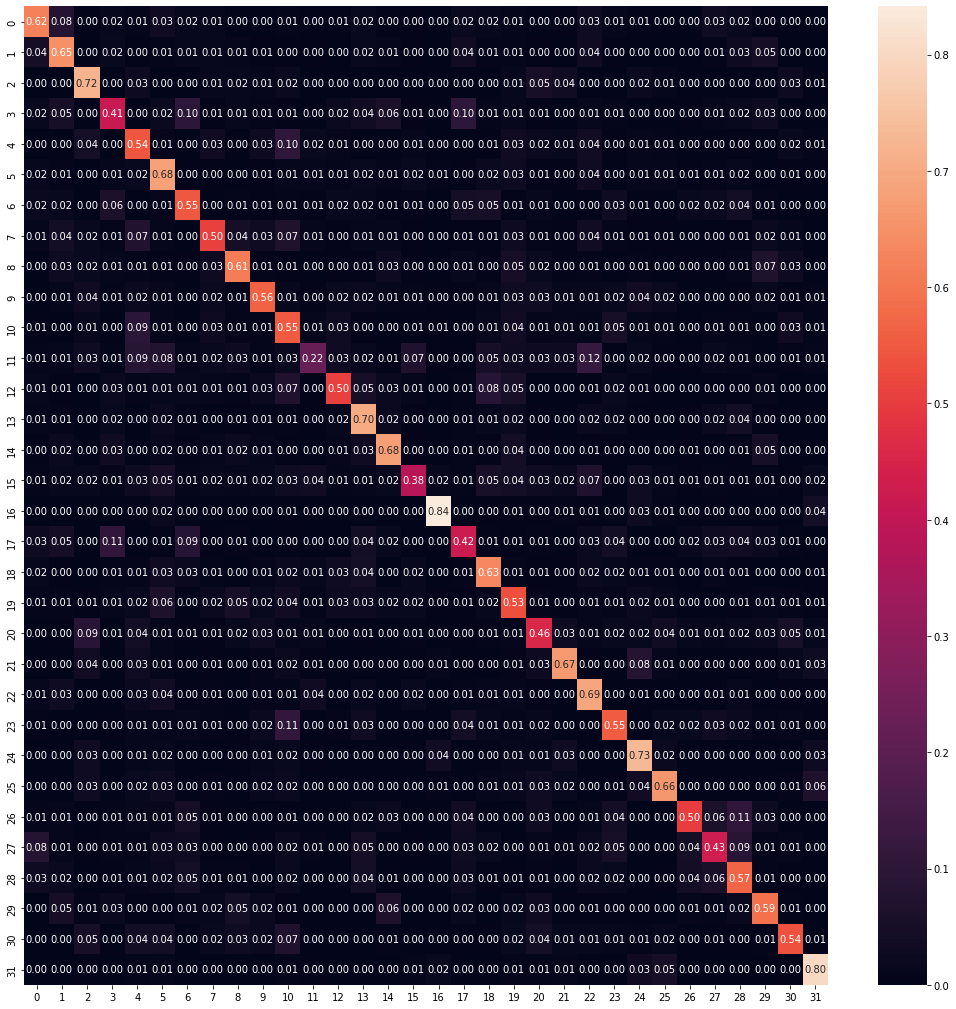

In [26]:
cm = confusion_matrix(y_test, nb_y_pred, normalize='true')
plt.figure(figsize=(18,18))
sb.heatmap(cm, annot=True, fmt='.2f')
plt.show()

In [27]:
nb_wts = pd.DataFrame(best_nb_model['nb'].coef_, columns = best_nb_model['vect'].get_feature_names(),
                   index=target_encoder.inverse_transform([i for i in range(0,32)]))

nb_wts.loc['math.AG', :].sort_values(ascending=False)[:40]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


curve            -3.642173
surface          -3.788086
variety          -3.857859
space            -4.014558
modulus          -4.247421
bundle           -4.250430
group            -4.411133
modulus space    -4.586752
algebraic        -4.789534
singularity      -4.803848
projective       -4.809104
rational         -4.885749
theorem          -4.992216
point            -5.026009
scheme           -5.035877
map              -5.052544
plane            -5.072918
type             -5.127557
cohomology       -5.142156
characteristic   -5.172009
abelian          -5.175804
invariant        -5.179614
vector           -5.181524
stable           -5.183438
threefolds       -5.185355
sheaf            -5.189201
toric            -5.191130
fano             -5.210624
function         -5.230505
manifold         -5.240596
theory           -5.263161
genus            -5.263161
geometry         -5.303378
vector bundle    -5.307707
non              -5.307707
conjecture       -5.325213
canonical        -5.340786
l

In [28]:
import torch
import torch.nn as nn
from torch.utils.data.dataset import random_split
from torchtext.vocab import vocab
from collections import Counter, OrderedDict
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_packed_sequence

In [29]:
class arxiv_dataset(torch.utils.data.Dataset):
    def __init__(self, text, label):
        self.text = text
        self.label = label
    def __len__(self):
        return self.label.size
    def __getitem__(self, idx):
        return self.text[idx], self.label[idx] 

In [30]:
token_counts = Counter()

for text in X_train['title']:
    tokens = tokenizer(text)
    token_counts.update(tokens)

print('Vocab-size:', len(token_counts))    

Vocab-size: 30344


In [31]:
sorted_by_freq_tuples = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)
ordered_dict = OrderedDict(sorted_by_freq_tuples)

vocab = vocab(ordered_dict)

vocab.insert_token("<pad>", 0)
vocab.insert_token("<unk>", 1)
vocab.set_default_index(1)

print([vocab[token] for token in ['variety', 'category', 'sheaf', 'group']])

[88, 39, 381, 2]


In [32]:
train_dataset = arxiv_dataset(X_train['title'].values, y_train.values)
test_dataset = arxiv_dataset(X_test['title'].values, y_test.values)

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
#device = torch.device("cuda:0")

# device = 'cpu'

text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]
label_pipeline = lambda x: int(x)


def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for _text, _label in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text), 
                                      dtype=torch.int64)
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))
    label_list = torch.tensor(label_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(
        text_list, batch_first=True)
    return padded_text_list.to(device), label_list.to(device), lengths.to(device)

In [35]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size, num_classes):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 
                                      embed_dim, 
                                      padding_idx=0) 
        self.rnn = nn.GRU(embed_dim, rnn_hidden_size, batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.dropout = nn.Dropout(p=0.2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, num_classes)
        #self.softmax = nn.Softmax(dim=1)

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        output, hidden = self.rnn(out)
        #output, _ = pad_packed_sequence(output, batch_first=True)
        out = hidden[-1, :, :]
        #out = output[:,-1,:]
        out = self.fc1(out)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.fc2(out)
        #out = self.softmax(out)
        return out

In [36]:
vocab_size = len(vocab)
embed_dim = 128
rnn_hidden_size = 128
fc_hidden_size = 64
num_classes = 32

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size, num_classes) 
model = model.to(device)

In [37]:
attention = ['math.FA', 'math.KT', 'math.OC', 'math.OA']
att = target_encoder.transform(attention)

In [38]:
value, counts = np.unique(y_train, return_counts=True)

for i in range(0,value.size):
    if value[i] in att:
        counts[i] = counts[i]/1.5
        

pair = [(x,1/(y**(1.5))) for x, y in zip(value, counts)]
pair.sort(key=lambda x:x[0])
class_wt = np.array([a[-1] for a in pair])
class_wt = class_wt/class_wt.sum()
print(pair)
print(class_wt.shape)

[(0, 4.495286596283188e-07), (1, 5.223455966780979e-07), (2, 2.8991432031043316e-07), (3, 5.062543370642105e-07), (4, 4.2664583071113994e-07), (5, 3.460262425084794e-07), (6, 7.370159243736988e-07), (7, 4.5251273500204827e-07), (8, 6.002056456949729e-07), (9, 5.609644923609637e-07), (10, 4.627436081762688e-07), (11, 1.1402880390148125e-06), (12, 1.6105785957945862e-06), (13, 3.610551701686051e-07), (14, 3.5662485412259516e-07), (15, 2.126093336117889e-06), (16, 4.1903545640377664e-07), (17, 1.0361554605564976e-06), (18, 4.888717716586091e-07), (19, 4.703629441205164e-07), (20, 3.443192761884595e-07), (21, 4.761830706187676e-07), (22, 3.843148520277709e-07), (23, 6.108669534447026e-07), (24, 5.18808389182936e-07), (25, 5.825832735604954e-07), (26, 1.4176966061651748e-06), (27, 8.144831308223237e-07), (28, 3.85598243573097e-07), (29, 2.5611060288963526e-07), (30, 8.50610411287861e-07), (31, 4.463816252471599e-07)]
(32,)


In [39]:
class_wt = torch.FloatTensor(class_wt).cuda()

In [40]:

#class_wt.to(device)

loss_fn = nn.CrossEntropyLoss(weight=class_wt)
 
optimizer = torch.optim.Adam(model.parameters(), lr=0.0015)

In [41]:
batch_size = 128

train_dl = DataLoader(train_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)

test_dl = DataLoader(test_dataset, batch_size=batch_size,
                     shuffle=False, collate_fn=collate_batch)

In [42]:
def train(dataloader):
    model.train()
    total_f1, total_loss = 0, 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)
        pred_label = torch.argmax(pred, dim=1)
        loss = loss_fn(pred, label_batch)
        #l1_C = 0.001
        #p = torch.cat([parameter.view(-1) for parameter in model.parameters()])
        #loss+=l1_C*torch.abs(p).sum()
        loss.backward()
        optimizer.step()
        f1 = f1_score(label_batch.cpu().numpy(), pred_label.cpu().detach().numpy(), average='macro')
        total_f1 += f1
        total_loss += loss.item()*label_batch.size(0)
    return batch_size*total_f1/len(dataloader.dataset), total_loss/len(dataloader.dataset)

In [43]:
def evaluate(dataloader):
    model.eval()
    total_f1, total_loss = 0, 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)
            pred_label = torch.argmax(pred, dim=1)
            loss = loss_fn(pred, label_batch)
            f1 = f1_score(label_batch.cpu().numpy(), pred_label.cpu().detach().numpy(), average='macro')
            total_f1 += f1
            total_loss += loss.item()*label_batch.size(0)
    return batch_size*total_f1/len(dataloader.dataset), total_loss/len(dataloader.dataset)

In [44]:
num_epochs = 48

torch.manual_seed(41)
 
for epoch in range(num_epochs):
    f1_train, loss_train = train(train_dl)
    f1_valid, loss_valid = evaluate(test_dl)
    print(f'Epoch {epoch} f1: {f1_train:.4f} val_f1: {f1_valid:.4f}')
    print('train_loss : {} val_loss {}'.format(loss_train, loss_valid))
    print('-'*100)

Epoch 0 f1: 0.4672 val_f1: 0.5900
train_loss : 1.6734318665413508 val_loss 1.2036511088676887
----------------------------------------------------------------------------------------------------
Epoch 1 f1: 0.6278 val_f1: 0.6670
train_loss : 1.0718458996075795 val_loss 0.9340226720750077
----------------------------------------------------------------------------------------------------
Epoch 2 f1: 0.7007 val_f1: 0.7179
train_loss : 0.8161533112152543 val_loss 0.7839453653041523
----------------------------------------------------------------------------------------------------
Epoch 3 f1: 0.7486 val_f1: 0.7548
train_loss : 0.6627721472167213 val_loss 0.6804640727601741
----------------------------------------------------------------------------------------------------
Epoch 4 f1: 0.7787 val_f1: 0.7800
train_loss : 0.5675663019482415 val_loss 0.6132765188970551
----------------------------------------------------------------------------------------------------
Epoch 5 f1: 0.8009 val_f1

In [45]:
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for text_batch, label_batch, lengths in test_dl:
        pred = model(text_batch, lengths)
        pred_label = torch.argmax(pred, dim=1)
        y_true.append(label_batch.cpu().numpy())
        y_pred.append(pred_label.cpu().detach().numpy())

In [46]:
y_pred = np.hstack(y_pred)
y_true = np.hstack(y_true)

In [47]:
print(classification_report(y_true, y_pred, target_names=target_encoder.inverse_transform([i for i in range(0,32)])))

              precision    recall  f1-score   support

     math.AC       0.88      0.83      0.86      4260
     math.AG       0.85      0.87      0.86      3855
     math.AP       0.93      0.89      0.91      5708
     math.AT       0.77      0.69      0.73      3936
     math.CA       0.87      0.82      0.84      4411
     math.CO       0.93      0.91      0.92      5072
     math.CT       0.73      0.77      0.75      3064
     math.CV       0.84      0.85      0.84      4242
     math.DG       0.88      0.82      0.85      3513
     math.DS       0.88      0.86      0.87      3675
     math.FA       0.88      0.91      0.89      6268
     math.GM       0.85      0.95      0.89      2291
     math.GN       0.81      0.88      0.84      1820
     math.GR       0.90      0.83      0.86      4931
     math.GT       0.89      0.90      0.89      4971
     math.HO       0.83      0.95      0.89      1512
     math.IT       0.98      0.96      0.97      4465
     math.KT       0.73    

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [49]:
from tqdm import tqdm
import time
!pip install transformers

In [50]:
from transformers import BertTokenizer

# Load the BERT tokenizer
b_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = b_tokenizer.encode_plus(
            text=sent,  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [51]:
all_enc_text = [b_tokenizer.encode(text, add_special_tokens=True) for text in X['title'].values]

MAX_LEN = max(len(seq) for seq in all_enc_text)
print(MAX_LEN)

52


In [52]:
train_inputs, train_masks = preprocessing_for_bert(X_train['title'].values)
val_inputs, val_masks = preprocessing_for_bert(X_test['title'].values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [53]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

train_labels = torch.tensor(y_train.values)
val_labels = torch.tensor(y_test.values)

batch_size = 128

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [54]:
%%time

from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 64, 32

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        prob = self.classifier(last_hidden_state_cls)

        return prob

CPU times: user 30.9 ms, sys: 1.03 ms, total: 31.9 ms
Wall time: 40.1 ms


In [55]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=5):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [56]:
def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_f1 = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        f1 = f1_score(b_labels.cpu().numpy(), preds.cpu().detach().numpy(), average='macro')
        val_f1.append(f1)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_f1 = np.mean(val_f1)

    return val_loss, val_f1

In [57]:
import random

loss_fn = nn.CrossEntropyLoss(weight=class_wt)


def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader, epochs=5, evaluation=True):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_f1 = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_f1:^10.6f} | {val_f1:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")
    return model


In [58]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=5)
model = train(bert_classifier, train_dataloader, val_dataloader, epochs=5, evaluation=True)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   3.413298   |     -      |     -     |   12.69  
   1    |   40    |   3.264382   |     -      |     -     |   11.07  
   1    |   60    |   3.108813   |     -      |     -     |   11.09  
   1    |   80    |   2.970312   |     -      |     -     |   11.12  
   1    |   100   |   2.875354   |     -      |     -     |   11.06  
   1    |   120   |   2.768728   |     -      |     -     |   11.07  
   1    |   140   |   2.626154   |     -      |     -     |   11.11  
   1    |   160   |   2.587618   |     -      |     -     |   11.06  
   1    |   180   |   2.508409   |     -      |     -     |   11.08  
   1    |   200   |   2.467651   |     -      |     -     |   11.17  
   1    |   220   |   2.383409   |     -      |     -     |   11.09  
   1    |   240   |   2.333874   |     -      |     -     |   11.08  


In [59]:
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
        pred = model(b_input_ids, b_attn_mask)
        pred_label = torch.argmax(pred, dim=1).flatten()
        y_true.append(b_labels.cpu().numpy())
        y_pred.append(pred_label.cpu().detach().numpy())

In [60]:
y_pred = np.hstack(y_pred)
y_true = np.hstack(y_true)

In [61]:
print(classification_report(y_true, y_pred, target_names=target_encoder.inverse_transform([i for i in range(0,32)])))

              precision    recall  f1-score   support

     math.AC       0.94      0.91      0.92      4260
     math.AG       0.93      0.93      0.93      3855
     math.AP       0.96      0.95      0.95      5708
     math.AT       0.85      0.77      0.81      3936
     math.CA       0.93      0.93      0.93      4411
     math.CO       0.98      0.97      0.97      5072
     math.CT       0.82      0.80      0.81      3064
     math.CV       0.93      0.92      0.92      4242
     math.DG       0.93      0.92      0.93      3513
     math.DS       0.95      0.93      0.94      3675
     math.FA       0.95      0.98      0.97      6268
     math.GM       0.93      0.99      0.95      2291
     math.GN       0.84      0.94      0.89      1820
     math.GR       0.94      0.92      0.93      4931
     math.GT       0.94      0.93      0.94      4971
     math.HO       0.90      0.96      0.93      1512
     math.IT       0.98      0.98      0.98      4465
     math.KT       0.78    